<a href="https://colab.research.google.com/github/nicolefrale/ProyectoSIG/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este Notebook utilizaremos la función "calcular_ndvi" para calcular el Índice de Vegetación de Diferencia Normalizada en un conjunto de imágenes satelitales multiespectrales de Landast 9 definidas en el área de estudio del proyecto final

In [2]:
#instalamos las librerias que necesitaremos
!pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 56.2 MB/s eta 0:00:00


In [3]:
#Importamos las librerias
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Vinculamos a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Instamos la libreria ipynb
!pip install ipynb

In [6]:
import ipynb
print("El módulo ipynb está instalado correctamente.")

El módulo ipynb está instalado correctamente.


In [7]:
#Verificamos el contenido de la carpeta de Drive
!ls /content/drive/MyDrive//Colab_Notebooks/


'Copia de Getting to know Numpy.ipynb'
'Copy of Pandas_Visualization_Meteorological_Data.ipynb'
 NDVI.ipynb
 NDVI.py
 NDVI.txt
 Pandas_Visualization_Meteorological_Data_Leydi_Catherine_Corredor_y_Laura_Calvijo.ipynb
 Prueba.ipynb
 __pycache__


In [12]:
# Usamos %run un comando mágico en IPython para ejecutar el Colab NDVI
%run "/content/drive/MyDrive/Colab_Notebooks/NDVI.py"

In [13]:
import os
print(os.listdir("/content/drive/MyDrive/Colab_Notebooks/"))

['Copia de Getting to know Numpy.ipynb', 'Copy of Pandas_Visualization_Meteorological_Data.ipynb', 'Pandas_Visualization_Meteorological_Data_Leydi_Catherine_Corredor_y_Laura_Calvijo.ipynb', 'NDVI.txt', '__pycache__', 'NDVI.py', 'NDVI.ipynb', 'Prueba.ipynb']


In [15]:
# Importamos la liberia que nos permite vincular la ruta del Colab en el cual se definio la función
import sys
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/')

In [16]:
# Cargamos las imagenes satelitales
import os

# Ruta donde están las imágenes TIFF en Dirve
ruta_carpeta = "/content/drive/MyDrive/Data_PSIG/img_ae2"

# Listar solo archivos .tif en la carpeta
archivos_tif = sorted([os.path.join(ruta_carpeta, f) for f in os.listdir(ruta_carpeta) if f.endswith('.tif')])

# Mostrar los archivos encontrados
print("Lista de imágenes TIFF encontradas:")
for i, archivo in enumerate(archivos_tif, start=1):
    print(f"Banda {i}: {archivo}")

Lista de imágenes TIFF encontradas:
Banda 1: /content/drive/MyDrive/Data_PSIG/img_ae2/clipmosaic_band_1_OBJECTID_1_142.tif
Banda 2: /content/drive/MyDrive/Data_PSIG/img_ae2/clipmosaic_band_2_OBJECTID_1_142.tif
Banda 3: /content/drive/MyDrive/Data_PSIG/img_ae2/clipmosaic_band_3_OBJECTID_1_142.tif
Banda 4: /content/drive/MyDrive/Data_PSIG/img_ae2/clipmosaic_band_4_OBJECTID_1_142.tif
Banda 5: /content/drive/MyDrive/Data_PSIG/img_ae2/clipmosaic_band_5_OBJECTID_1_142.tif
Banda 6: /content/drive/MyDrive/Data_PSIG/img_ae2/clipmosaic_band_6_OBJECTID_1_142.tif


In [17]:
import rasterio
import numpy as np

# Creamos un diccionario vacio para almacenar las bandas
bandas = {}

# Con un bucle for leemos cada archivo y le asignamos un número de banda
for i, archivo in enumerate(archivos_tif, start=1):
    with rasterio.open(archivo) as src:
        bandas[i] = src.read(1).astype(np.float32)  # Leer la única banda del archivo

# Verificamos que se cargaron correctamente
print(f"\nSe cargaron {len(bandas)} bandas:")
for i, data in bandas.items():
    print(f"Banda {i}: min={data.min()}, max={data.max()}")



Se cargaron 6 bandas:
Banda 1: min=0.0, max=65535.0
Banda 2: min=0.0, max=65535.0
Banda 3: min=0.0, max=65535.0
Banda 4: min=0.0, max=65535.0
Banda 5: min=0.0, max=65535.0
Banda 6: min=0.0, max=65535.0


In [18]:
from NDVI import calcular_ndvi

banda_4 = bandas[4]
banda_5 = bandas[5]

In [19]:
funcion_reutilizada_NDVI = calcular_ndvi(banda_4, banda_5)

/content/drive/MyDrive/Colab_Notebooks/NDVI.py:2: RuntimeWarning: invalid value encountered in divide
  return (banda_4 - banda_5) / (banda_4 + banda_5)


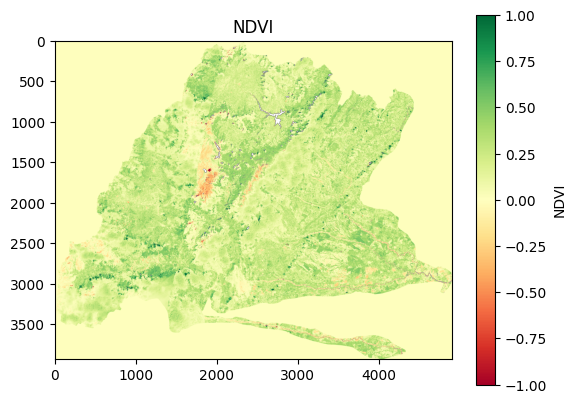

In [20]:
# Mostrar el NDVI con matplotlib
plt.imshow(funcion_reutilizada_NDVI, cmap='RdYlGn')
plt.colorbar(label="NDVI")
plt.title("NDVI")
plt.show()